**UE Initiation à la R&D - ENSIIE (2022/2023)**

# Introduction

In this tutorial, we illustrate the following concepts:

- outlier detection,
- matrix profile.

In [1]:
import datetime as dt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from loadmydata.load_nyc_taxi import load_nyc_taxi_dataset
from scipy.signal import welch

In [2]:
def fig_ax(figsize=(15, 5)):
    return plt.subplots(figsize=figsize)

# Data

In [3]:
X, _, description = load_nyc_taxi_dataset()

print(description)

This data set contains the number of New York taxi passengers aggregated in 30 minutes buckets for the period between July 2014 and January 2015. There are five anomalies occur during the NYC marathon, Thanksgiving, Christmas, New Years day, and a snow storm.

The raw data is from the NYC Taxi and Limousine Commission [1] and has been curated by [2].

[1]: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page 
[2]: Ahmad, S., Lavin, A., Purdy, S., & Agha, Z. (2017). Unsupervised real-time anomaly detection for streaming data. Neurocomputing.


In [4]:
original_calendar_time_array = X.timestamp.to_numpy()
original_taxi_count_np = X.taxi_count.to_numpy()

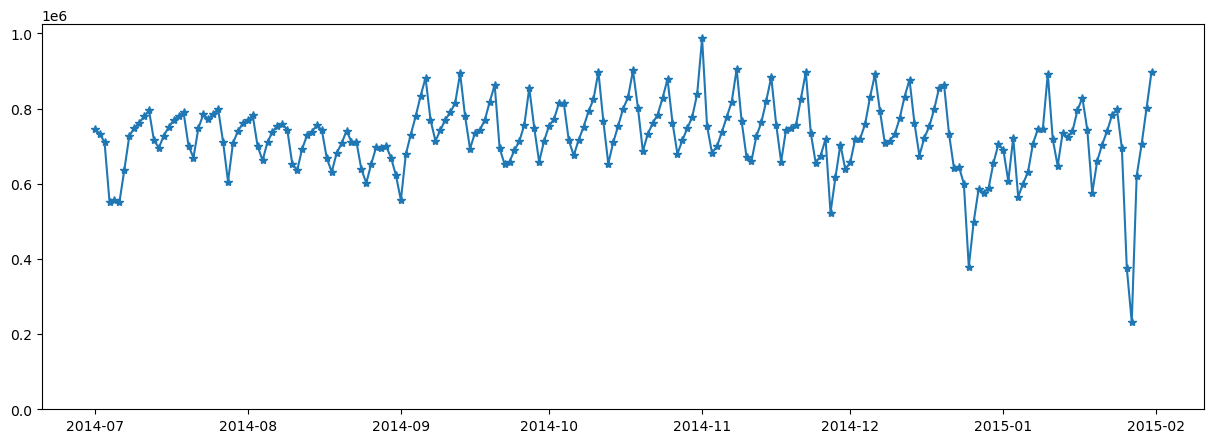

In [5]:
daily_taxi_count = X.resample("1D", on="timestamp").sum()
daily_taxi_count_np = daily_taxi_count.to_numpy().squeeze()
calendar_time_array = daily_taxi_count.index.to_numpy()
n_samples = daily_taxi_count_np.size
fig, ax = fig_ax()
ax.plot(daily_taxi_count, "*-")
_ = ax.set_ylim(0)

<div class="alert alert-success" role="alert">
    <p><b>Question</b></p>
    <p>What are the sizes of the original signal and daily signal?</p>
</div>

# Frequency content

**Original signal**

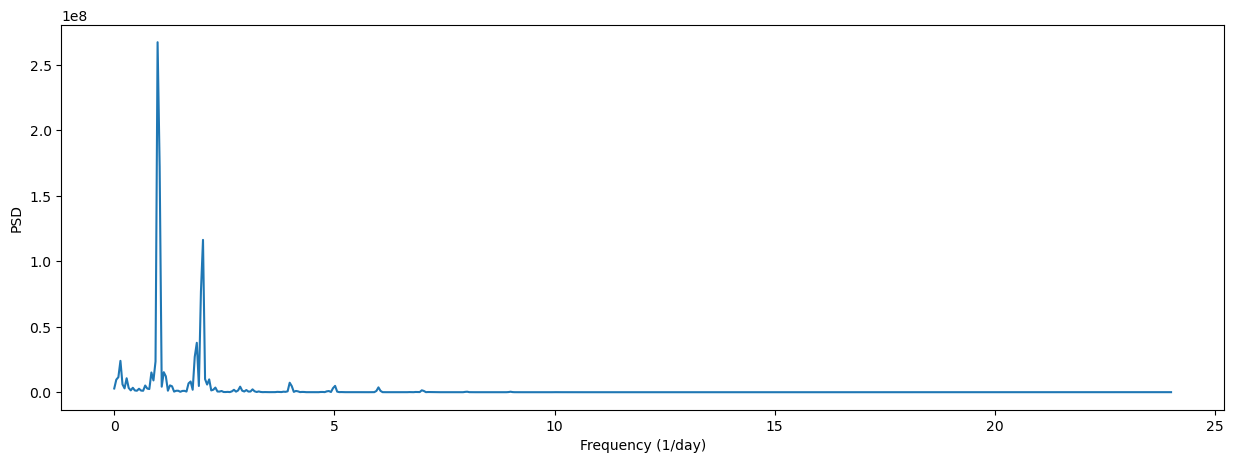

In [12]:
freqs, Pxx_den = welch(original_taxi_count_np, fs=48, nperseg=1024)
fig, ax = fig_ax()
ax.plot(freqs, Pxx_den)
ax.set_xlabel("Frequency (1/day)")
ax.set_ylabel("PSD");

**Daily signal**

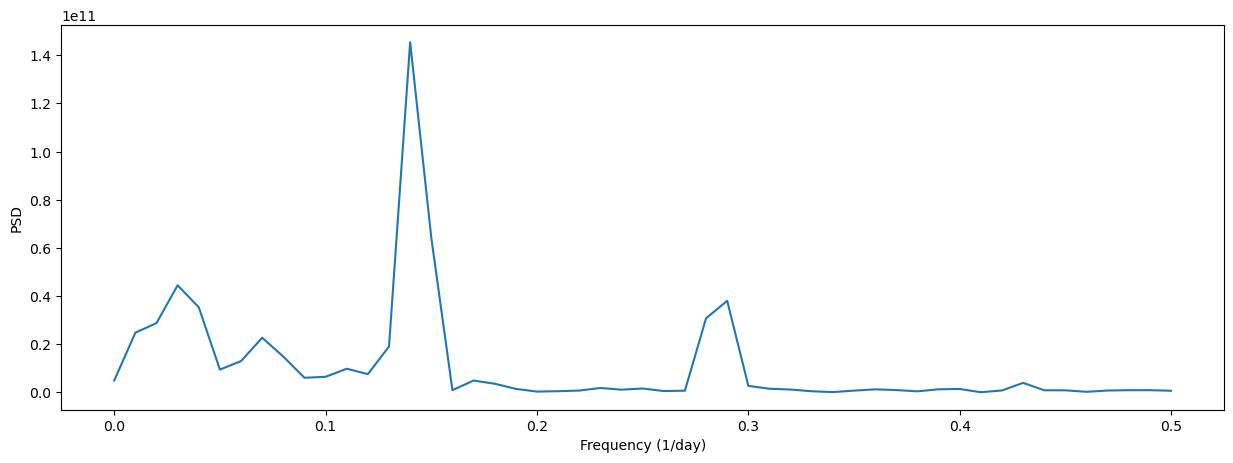

In [10]:
freqs, Pxx_den = welch(daily_taxi_count_np, fs=1, nperseg=100)
fig, ax = fig_ax()
ax.plot(freqs, Pxx_den)
ax.set_xlabel("Frequency (1/day)")
ax.set_ylabel("PSD");

<div class="alert alert-success" role="alert">
    <p><b>Question</b></p>
    <p>What are the two periodic phenomena?</p>
</div>

# Matrix profile

Informally, an outlier is a motif that only appears once a signal.
The distance of this particular pattern from all other patterns is large.

Algorithmically:

- Compute the pairwise distances between all patterns.
- Set to Inf the distance between patterns that overlap.
- Take the minimum pairwise distance for each pattern (the profile)

Then we apply outlier detection on the profile.

<div class="alert alert-success" role="alert">
    <p><b>Question</b></p>
    <p>Implement the matrix profile and run it for patterns of lengths 1 week (on the daily signal) and 1 day (on the original signal). Add comment in your code. Report the dates that you find interesting.</p>
</div>